In [1]:
import geometry
import numpy as np
import numba as nb
import ezdxf
import matplotlib.pyplot as plt

In [2]:
# Load geometry
doc = ezdxf.readfile("oblong_rectangle.dxf")
msp = doc.modelspace()

In [3]:
# Get all polylines
polylines = msp.query("LWPOLYLINE")
paths = [np.array(x.get_points())[:, [0, 1, 4]] for x in polylines]
paths[0]

array([[1.70000000e+01, 0.00000000e+00, 4.14213562e-01],
       [2.00000000e+01, 3.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 7.00000000e+00, 4.14213562e-01],
       [1.70000000e+01, 1.00000000e+01, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 4.14213562e-01],
       [0.00000000e+00, 7.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.00000000e+00, 4.14213562e-01],
       [3.00000000e+00, 4.00000000e-16, 0.00000000e+00]])

In [4]:
path = geometry.Path.from_compact_array(paths[0].astype(np.float32))

In [5]:
path2 = path.offset(1)
path2.is_null()

False

In [6]:
path2.segments()

In [7]:
segs = path.segments()
segs[0].end_angle

-0.3997265696525574

In [8]:
np.atan(.4142)

np.float64(0.3926875054336765)

In [9]:
np.atan(.4142)/np.pi*180*4

np.float64(89.99734691548097)

In [10]:
path.to_compact_array()

array([[1.7000000e+01, 0.0000000e+00, 1.9526216e-01],
       [2.0000000e+01, 3.0000000e+00, 0.0000000e+00],
       [2.0000000e+01, 7.0000000e+00, 1.9526218e-01],
       [1.7000000e+01, 1.0000000e+01, 0.0000000e+00],
       [3.0000000e+00, 1.0000000e+01, 1.9526218e-01],
       [0.0000000e+00, 7.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.0000000e+00, 1.9526215e-01],
       [3.0000000e+00, 4.0000001e-16, 0.0000000e+00]], dtype=float32)

In [11]:
points = np.vstack([np.array([np.cos(theta), np.sin(theta), 0]) for theta in np.linspace(0, np.pi*2, 6)])

path = geometry.Path.from_compact_array(points.astype(np.float32))
path = path.offset(1)

(np.float64(-1.9994677901268005),
 np.float64(2.1904508471488953),
 np.float64(-2.1461621910333624),
 np.float64(2.1461621314287154))

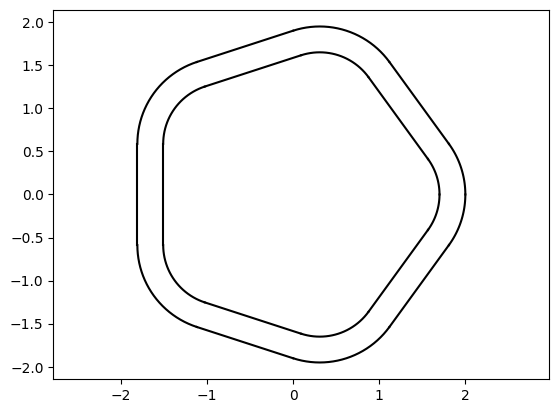

In [12]:
import matplotlib.pyplot as plt

def draw_line(ax, line: geometry.LineSegment):
    plt.plot([line.start.x, line.end.x], [line.start.y, line.end.y], 'k-')

def draw_arc(ax, arc: geometry.ArcSegment):
    # print(f"Start angle: {arc.start_angle}, End angle: {arc.end_angle}, Center: {arc.center}")
    angle = np.linspace(arc.start_angle, arc.end_angle, 25)
    x = arc.center.x + arc.radius * np.cos(angle)
    y = arc.center.y + arc.radius * np.sin(angle)
    ax.plot(x, y, 'k-')

def draw_segment(ax, segment: geometry.Segment):
    if isinstance(segment, geometry.LineSegment):
        draw_line(ax, segment)
    elif isinstance(segment, geometry.ArcSegment):
        draw_arc(ax, segment)

def draw_path(ax, path: geometry.Path):
    for segment in path.segments():
        draw_segment(ax, segment)

ax = plt.gca()
draw_path(ax, path)
temp = path.offset(-0.3)
draw_path(ax, temp)
plt.axis('equal')
# draw_path(ax, path.offset(-1))@

In [13]:
def format_data(d, N=2):
    if isinstance(d, dict):
        return {k: format_data(v, N) for k, v in d.items()}
    elif hasattr(d, '__iter__'):
        return tuple([format_data(x) for x in d])
    else:
        return round(d, N)

for segment in temp.segments():
    print(format_data(segment.to_dict()))

{'center': (1.0, 0.0), 'start': (1.7, 0.0), 'end': (1.57, 0.41), 'radius': 0.7, 'start_angle': -0.0, 'end_angle': 0.63, 'nhat_start': (1.0, 0.0), 'nhat_end': (0.81, 0.59), 'is_clockwise': 0}
{'start': (1.57, 0.41), 'end': (0.88, 1.36), 'nhat': (0.81, 0.59), 'vhat': (-0.59, 0.81)}
{'center': (0.31, 0.95), 'start': (0.88, 1.36), 'end': (0.09, 1.62), 'radius': 0.7, 'start_angle': 0.63, 'end_angle': 1.88, 'nhat_start': (0.81, 0.59), 'nhat_end': (-0.31, 0.95), 'is_clockwise': 0}
{'start': (0.09, 1.62), 'end': (-1.03, 1.25), 'nhat': (-0.31, 0.95), 'vhat': (-0.95, -0.31)}
{'center': (-0.81, 0.59), 'start': (-1.03, 1.25), 'end': (-1.51, 0.59), 'radius': 0.7, 'start_angle': 1.88, 'end_angle': 3.14, 'nhat_start': (-0.31, 0.95), 'nhat_end': (-1.0, 0.0), 'is_clockwise': 0}
{'start': (-1.51, 0.59), 'end': (-1.51, -0.59), 'nhat': (-1.0, -0.0), 'vhat': (0.0, -1.0)}
{'center': (-0.81, -0.59), 'start': (-1.51, -0.59), 'end': (-1.03, -1.25), 'radius': 0.7, 'start_angle': -3.14, 'end_angle': -1.88, 'nhat

In [14]:


def print_segment_info(seg):
    d = seg.to_dict()
    d2 = dict()
    for k, v in d.items():
        if "nhat" in k:
            d2[k] = format_data(v, 2)
    print(d2)

print_segment_info(path2.segments()[0])

# for seg in path2.segments():
#     print_segment_info(seg)

# from geometry import Vec2D
# test = geometry.ArcSegment.arc1(Vec2D(0, 0), Vec2D(1, 0), np.pi/8)
# print_segment_info(test)

{'nhat_start': (0.0, -1.0), 'nhat_end': (0.39, -0.92)}


Path 0 memory address: 1079851200
Path 1 memory address: 1077975328
i: 0
j: 0
test
j: 1
test
Path1 index: 0, Path2 index: 0
Path1 memory address: 1079851200, Path2 memory address: 1079851200
i: 1
j: 0
test
j: 1
test
Path1 index: 0, Path2 index: 1
Path1 memory address: 1079851200, Path2 memory address: 1077975328
i: 2
j: 0
test
j: 1
test
Path1 index: 0, Path2 index: 1
Path1 memory address: 1079851200, Path2 memory address: 1077975328
i: 3
j: 0
test
j: 1
test
Path1 index: 0, Path2 index: 0
Path1 memory address: 1079851200, Path2 memory address: 1079851200
i: 4
j: 0
test
j: 1
test
Path1 index: 0, Path2 index: 1
Path1 memory address: 1079851200, Path2 memory address: 1077975328
i: 5
j: 0
test
j: 1
test
Path1 index: 0, Path2 index: 1
Path1 memory address: 1079851200, Path2 memory address: 1077975328
i: 6
j: 0
test
j: 1
test
Path1 index: 1, Path2 index: 0
Path1 memory address: 1077975328, Path2 memory address: 1079851200
i: 7
j: 0
test
j: 1
test
Path1 index: 1, Path2 index: 0
Path1 memory ad

Vec2D(0.0, 0.0)

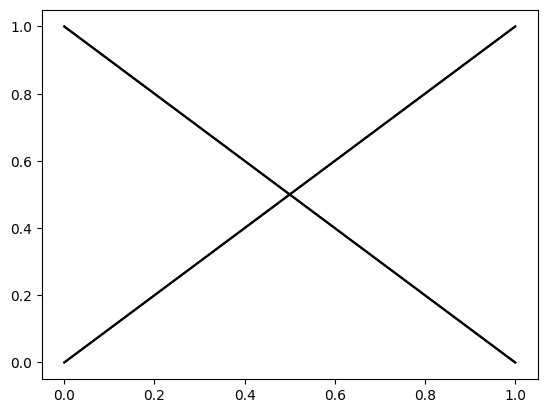

In [15]:
from geometry import intersections, Path, LineSegment, Vec2D

path1 = Path.from_compact_array(np.array([[0, 0, 0], [1, 1, 0]]).astype(np.float32), False)
path2 = Path.from_compact_array(np.array([[1, 0, 0], [0, 1, 0]]).astype(np.float32), False)

ax = plt.gca()
draw_path(ax, path1)
draw_path(ax, path2)

test = intersections([path1, path2])

path1.segments()[1].end

In [17]:
path1.segments()